<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher-Examples/blob/main/SingleLayerWWExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install weightwatcher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.4 MB/s eta 0:00:00


In [7]:
import torch
import torch.nn as nn

# Define the model
class SingleLayerModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SingleLayerModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_size = 500  # Example input size
output_size = 500  # Example output size
model = SingleLayerModel(input_size, output_size)

# Set custom weights
weight_matrix = torch.randn(output_size, input_size)
model.linear.weight = nn.Parameter(weight_matrix)


In [8]:
import weightwatcher as ww
watcher = ww.WeightWatcher(model=model)
watcher.describe()

,layer_id,name,M,N,Q,layer_type,longname,num_evals,rf
0,1,Linear,500,500,1.0,dense,linear,500,1


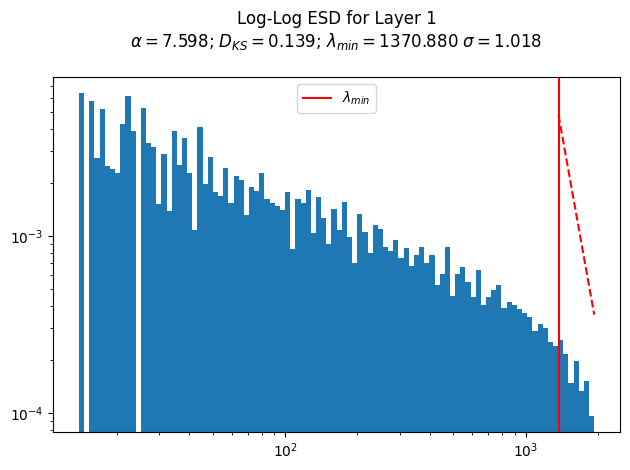

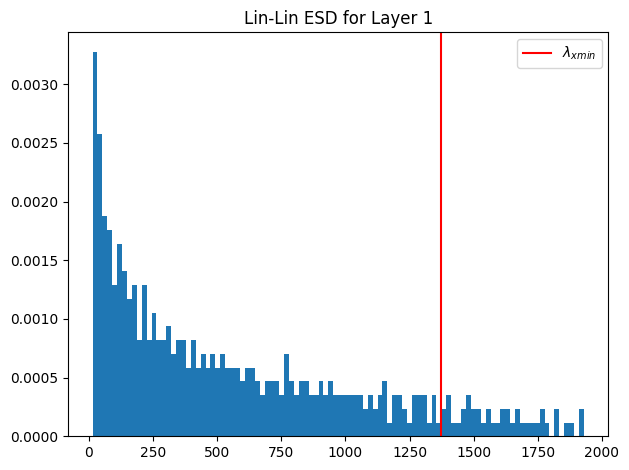

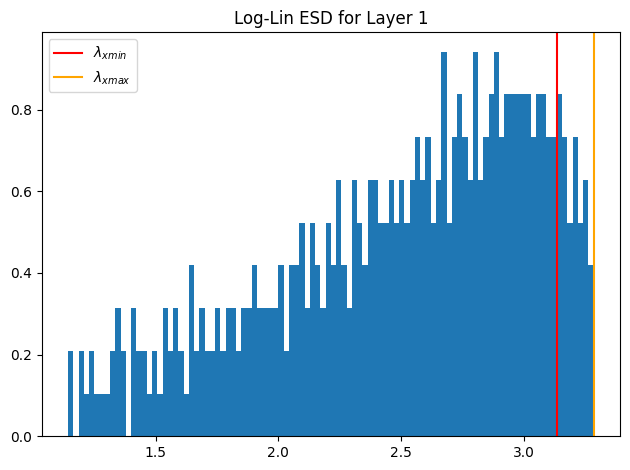

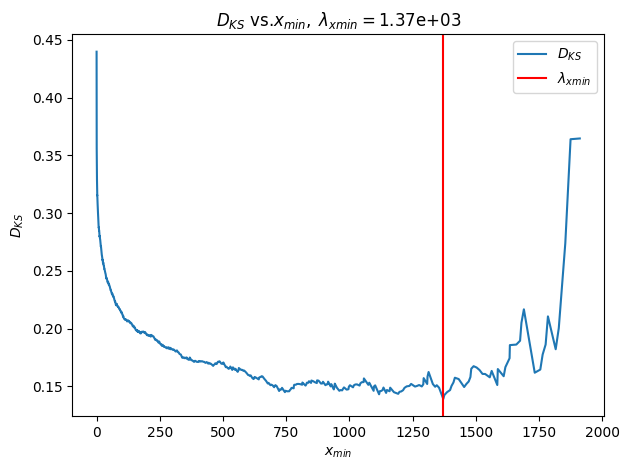

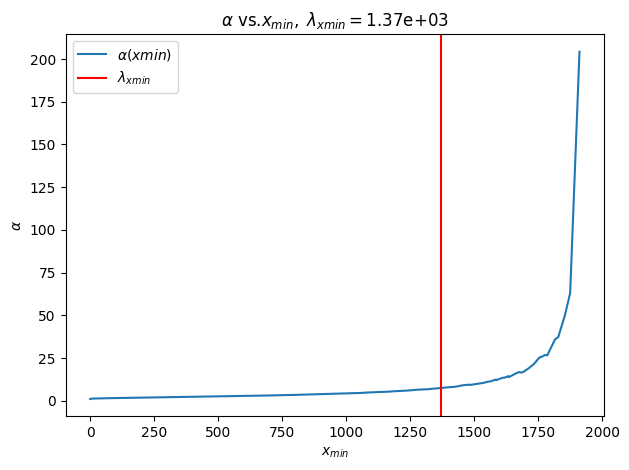

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,1,Linear,0.139073,500,500,1.0,7.598193,24.963491,0.919558,True,...,1.018123,1929.527443,128.860933,success,43.926387,0.041424,under-trained,0,1929.527443,1370.880353


<Figure size 640x480 with 0 Axes>

In [9]:
watcher.analyze(plot=True)